In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# Twitter Api Credentials
consumerKey = "8gkozHxDwmXsvgLvqXMBWcx9T"
consumerSecret = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
accessToken = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
accessTokenSecret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [57]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name="kpk", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 20 tweets
print("Show the 20 recent tweets:\n")
i=1
for tweet in posts[:20]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 20 recent tweets:

1) @jdecked I can barely smell anything. I blame allergies and a tree in the house.

2) @AdamTReineke yeah just random ones poking about for the perfect twitchy eye

3) Wasn't prepared for how much nose-hair becomes an issue as you get older.

4) @cramforce New GDPR rules require reconfirmation of all user settings every 6 months. ianal

5) @jttrw Almost all kids toothpaste is bubblegum flavoured and is truly horrible. The kids hate it and it smells like vomit.

6) Reassuring to read of trial failures. It has seemed so much of a formality.  https://t.co/hrf1Hlq5YX

7) “As of December 10, the following was updated:

Outdoor playgrounds can open“

8) @apelad I wonder if there’s an easier way out, like changing your age to 105 or changing your language or country to something workable but obscure.

9) @nwthomas_ @jack Sorry to go off on one, been thinking about this for a bit.

10) @nwthomas_ @jack And the company that helped get him there refuses to match my m

In [58]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,@jdecked I can barely smell anything. I blame ...
1,@AdamTReineke yeah just random ones poking abo...
2,Wasn't prepared for how much nose-hair becomes...
3,@cramforce New GDPR rules require reconfirmati...
4,@jttrw Almost all kids toothpaste is bubblegum...


In [59]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,I can barely smell anything. I blame allergie...
1,yeah just random ones poking about for the pe...
2,Wasn't prepared for how much nose-hair becomes...
3,New GDPR rules require reconfirmation of all ...
4,Almost all kids toothpaste is bubblegum flavo...
...,...
195,You’d have to turn news away from popularism ...
196,I love it. Twenty or thirty years pass and th...
197,How long until we find the second monolith?
198,My feeling is that there are many possible g...


In [60]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,I can barely smell anything. I blame allergie...,0.100000,0.050000
1,yeah just random ones poking about for the pe...,0.750000,0.250000
2,Wasn't prepared for how much nose-hair becomes...,0.266667,0.183333
3,New GDPR rules require reconfirmation of all ...,0.454545,0.136364
4,Almost all kids toothpaste is bubblegum flavo...,0.950000,-0.900000
...,...,...,...
195,You’d have to turn news away from popularism ...,0.666667,0.156250
196,I love it. Twenty or thirty years pass and th...,0.600000,0.500000
197,How long until we find the second monolith?,0.200000,-0.025000
198,My feeling is that there are many possible g...,0.550000,0.300000


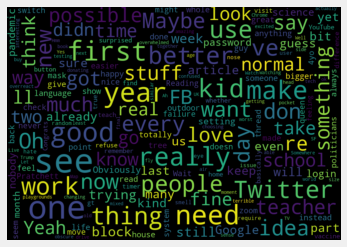

In [63]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [64]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I can barely smell anything. I blame allergie...,0.100000,0.050000,Positive
1,yeah just random ones poking about for the pe...,0.750000,0.250000,Positive
2,Wasn't prepared for how much nose-hair becomes...,0.266667,0.183333,Positive
3,New GDPR rules require reconfirmation of all ...,0.454545,0.136364,Positive
4,Almost all kids toothpaste is bubblegum flavo...,0.950000,-0.900000,Negative
...,...,...,...,...
195,You’d have to turn news away from popularism ...,0.666667,0.156250,Positive
196,I love it. Twenty or thirty years pass and th...,0.600000,0.500000,Positive
197,How long until we find the second monolith?,0.200000,-0.025000,Negative
198,My feeling is that there are many possible g...,0.550000,0.300000,Positive


In [65]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  I can barely smell anything. I blame allergies and a tree in the house.

2)  yeah just random ones poking about for the perfect twitchy eye

3) Wasn't prepared for how much nose-hair becomes an issue as you get older.

4)  New GDPR rules require reconfirmation of all user settings every 6 months. ianal

5) Reassuring to read of trial failures. It has seemed so much of a formality.  

6) _  And the company that helped get him there refuses to match my meagre donations to my kid’s school. So many mixed feelings.

7) _ I also have very mixed feelings about ’s charity work. He’s already donated more money than I will ever see in my life, yet the pool has grown more than it has shrunk. The sheer size of it makes my own donating feel worthless.

8) _ I see no earthly use for having more than a billion. You could buy power by buying companies/news/politicians i guess.

But I have more respect for those on normal salaries who give $100.

9) Brexit is in its nth f

In [66]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  Almost all kids toothpaste is bubblegum flavoured and is truly horrible. The kids hate it and it smells like vomit.

2) _  Sorry to go off on one, been thinking about this for a bit.

3) _ imho we should tax the billionaires instead of giving them credit for donating a fraction of their excessive wealth to causes of their choosing

4) Here is a terrible article behind a paywall. I implore you not to tap the link and read this garbage take. Don’t pay to view it. Don’t look at the ads. Don’t read more articles.

5)   Are you saying I’m too old to irrationally overreact? That is outrageous.

6)  Well, at least Twitter keeps the head size consistent.  Apple makes that head bigger and bigger.

7) Twitter’s shrug emoji 🤷‍♂️ is just really hard to see. I always think it’s someone balancing two plates.

8) The death penalty system seems overly bureaucratic and generates the wrong results (as every overly bureaucratic system tends to do). Are these really the wors

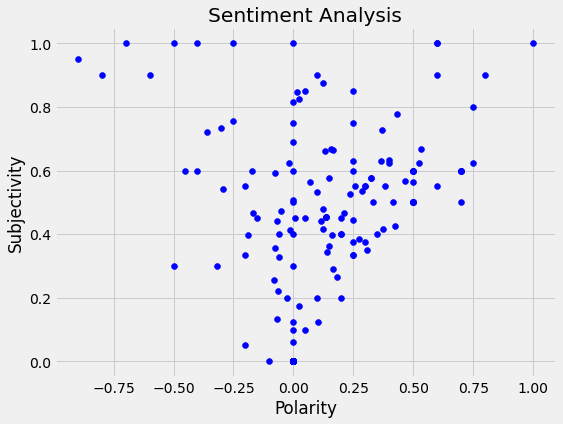

In [67]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [68]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

44.0

In [69]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.0

In [70]:
# Show the value counts
df['Analysis'].value_counts()

Positive    88
Neutral     76
Negative    36
Name: Analysis, dtype: int64

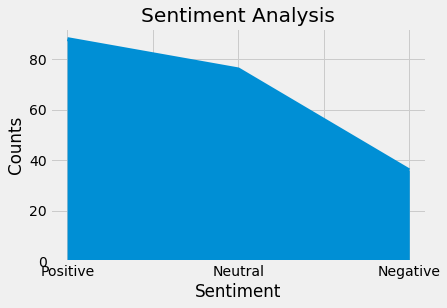

In [71]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

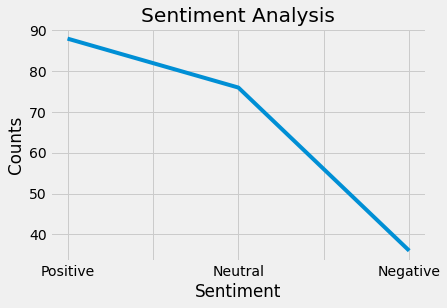

In [72]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()